## Mobility of a sedimenting lattice as a function of volume fraction

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import solvePeriodic
import directSolvePeriodic
import matrixPeriodic_Real as me
import matrixM2r0 as m2
#import testG3s3s as test
from math import *
PI = 3.14159265359

In [2]:
#Parameters
Np=1
b, eta, dim = 1.0, 1.0, 3
ta =(4*np.pi/3)**(1.0/3) 
L = ta/np.asarray([0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.7663094323935531, 0.8059966052641452])

# Memory allocation
v = np.zeros(dim*Np)      
o = np.zeros(dim*Np)  
r = np.zeros(dim*Np)        
F = np.zeros(dim*Np)
T = np.zeros(dim*Np)  
vv  = np.zeros(np.size(L))
phi = np.zeros(np.size(L) )

S = np.zeros(Np*5)
D = np.zeros(Np*3)

mu=1.0/(6*np.pi*eta*b)

In [3]:
#(0.5236*3/(4*np.pi*b**3))**(1/3)*ta ##reverse engineer above numbers in L= ta/array()

In [4]:
L

array([16.11991954,  5.37330651,  4.02997989,  3.22398391,  2.68665326,
        2.30284565,  2.10357838,  1.99999844])

In [5]:
(4*np.pi*b**3)/(3*L**3)

array([0.001 , 0.027 , 0.064 , 0.125 , 0.216 , 0.343 , 0.45  , 0.5236])

In [6]:
# phi = (4*np.pi*b**3)/(3*L**3)
# phi

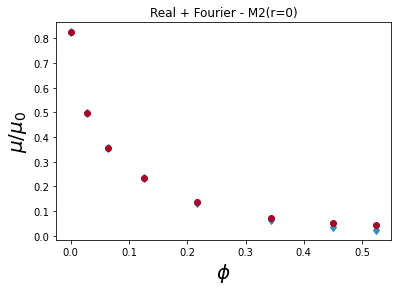

volume fraction   simulation	 Zick & Homsy (1982)
0.001		  0.825		 0.825	
0.027		  0.498		 0.498	
0.064		  0.355		 0.356	
0.125		  0.232		 0.233	
0.216		  0.135		 0.134	
0.343		  0.072		 0.065	
0.450		  0.052		 0.036	
0.524		  0.046		 0.024	


In [7]:
# Deafult value of xi = sqrt(pi)/L
b=1.

#L=np.linspace(2.6,4.8)

vv  = np.zeros(np.size(L))
phi = np.zeros(np.size(L) )

S = np.zeros(5)
D = np.zeros(3)

phi = (4*np.pi*b**3)/(3*L**3)


for i in range(np.size(L)):
    v = v*0
    F = F*0

    r[0], r[1], r[2] = 0.0, 0.0, 0.0

    F[2] = -1  ## gravity                           
    
    Rbm = solvePeriodic.Rbm(b, eta, L[i], xi=sqrt(pi)/L[i])   
    Rbm.krylovSolve(v, o, F, T, S, D)

    mu00 = mu*F[2]
    vv[i] = v[2]/mu00
    

exR = [.825, .498, .356, .233, .134, .065, 0.036, 0.024]
plt.title('Real + Fourier - M2(r=0)')
plt.plot(phi, exR, 'd', color="#348ABD", label='Zick and Homsy')
plt.plot(phi, vv, 'o', color="#A60628", label='Simulation')

plt.xlabel(r'$\phi$', fontsize=20); plt.ylabel(r'$\mu/\mu_0$', fontsize=20)
# plt.legend(loc='upper right', shadow=True)
plt.show()

print ('volume fraction   simulation\t Zick & Homsy (1982)')
for i in range(np.size(L)):
    print ('%1.3f\t\t  %1.3f\t\t %1.3f\t'%(phi[i], vv[i], exR[i] ))

In [ ]:
volume fraction   simulation	 Zick & Homsy (1982) ## for Nm=6
0.001		  0.825		 0.825	
0.027		  0.498		 0.498	
0.064		  0.356		 0.356	
0.125		  0.236		 0.233	
0.216		  0.144		 0.134	
0.343		  0.096		 0.065	
0.450		  0.092		 0.036	
0.524		  0.100		 0.024	

In [ ]:
volume fraction   simulation	 Zick & Homsy (1982)  ## for Nm=4
0.001		  0.825		 0.825	
0.027		  0.498		 0.498	
0.064		  0.356		 0.356	
0.125		  0.236		 0.233	
0.216		  0.145		 0.134	
0.343		  0.097		 0.065	
0.450		  0.094		 0.036	
0.524		  0.102		 0.024	

In [ ]:
volume fraction   simulation	 Zick & Homsy (1982) ## superposition Nm=4 
0.001		  0.825		 0.825	
0.027		  0.499		 0.498	
0.064		  0.360		 0.356	
0.125		  0.245		 0.233	
0.216		  0.159		 0.134	
0.343		  0.110		 0.065	
0.450		  0.100		 0.036	
0.524		  0.104		 0.024	

In [7]:
len(GHH)

8

In [8]:
np.linalg.cond(GHH)

array([ 30.18540707,  33.71176197,  35.19239408,  28.87020986,
        12.3849708 , 567.25105037,  38.96432618,  24.93022824])

In [16]:
##G3s3s is not symmetric in matrix form, is that to be expected?? 

In [17]:
## condition number of GHH alone horrible
## GoHH obviously improves things, as it ads diagonal elements (do we need the off-diag elements in GoHH?)
## M2(r=0) itself is not invertible, does that make sense? 

In [18]:
for i in range(len(GHH)):
    print(np.linalg.norm(GHH[i])) ##GHH is the problem, not GH1s or G1sH

0.5484147575149751
0.5329177322229312
0.5241993853169308
0.5208137618615843
0.5214909476072649
0.525163326649123
0.5309660016477573
0.5382191652834978
0.5464013887707942
0.5551207310538864
0.5640877837674968
0.5730925183031289
0.5819853835716201
0.5906623672834584
0.5990534364210506
0.6071137151550745
0.6148168125035703
0.6221498058739032
0.6291094848243972
0.6356995469164963
0.641928509803035
0.6478081608929376
0.653352410072783
0.6585764445200887
0.6634961099233648
0.6681274613757328
0.6724864413831464
0.6765886530231674
0.6804492042143729
0.6840826049911668
0.6875027041316623
0.6907226548344401
0.6937549016630181
0.6966111828823096
0.6993025437533643
0.7018393574460374
0.7042313510595543
0.7064876348722979
0.708616733422636
0.7106266173883895
0.7125247355109664
0.7143180460218912
0.7160130471901802
0.7176158067306806
0.7191319899052261
0.7205668862172617
0.721925434651775
0.7232122474500813
0.724431632436376
0.7255876139324547
